# 1. Packages Installation

In [1]:
# all necesssary packages
import math
import random 
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

# 2. Load the Dataset

In [2]:
# importing datasets
X, y = load_svmlight_file("diabetes_scale.txt")
X = X.toarray()

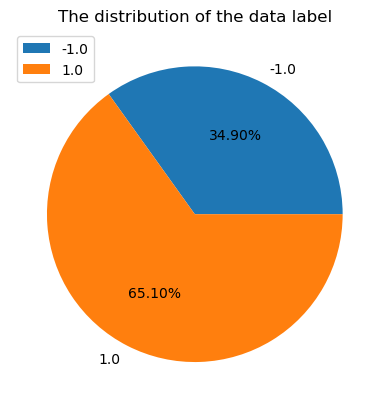

In [3]:
# visualize the dataset
dic = dict(Counter(y))
plt.pie(dic.values(), labels = dic.keys(), autopct = "%.2f%%")
plt.title("The distribution of the data label")
plt.legend()
plt.show()

# 3. Model Setting



In [23]:
class Perceptron():
    
    def split_data(self, X, y):
        X_train_all, X_test, y_train_all, y_test = train_test_split(
            X, 
            y, 
            test_size=0.2, 
            random_state=42,
            stratify=y
            )
        X_train,X_val,y_train,y_val = train_test_split(
            X_train_all, 
            y_train_all, 
            test_size=0.2, 
            random_state=0,
            stratify=y_train_all
            )

        self.X = {"train": X_train, "val" : X_val, "test": X_test}
        self.y = {"train": y_train, "val" : y_val, "test": y_test}

    def loss_01(self, X, y, w):
        if y*(np.dot(X, w.T)) > 0:
            return 0
        else:
            return 1
    
    def hinge_loss(self,X, y, w):
        gradient = -y*(np.dot(X,w.T))
        return max(0, 1+gradient)

    def perceptron_loss(self,X, y, w):
        gradient = -y*(np.dot(X,w.T))
        return max(0, gradient)

    def pred_accuracy(self, X, y):
        y_preds = self.predict(X)
        accuracy = f1_score(y_preds,y)
        return accuracy
    
    def add_bias(self, X):
        return np.hstack((X,np.ones((X.shape[0],1))))
    
    def fit(self, X, y, loss_func, lr=0.01, bias=False, epochs=30):
        if bias:
            X = self.add_bias(X)
        self.w = np.array(np.random.rand(1, X.shape[1]),)
        self.split_data(X,y)
        self.acc = {"train":[], "test":[], "val":[]}
        self.loss = {"train":[], "test":[], "val":[]}
        
        # training the model based on the gradient 
        for i in range(epochs):
            # print("Training for %d Epoch..."%(i+1))
            temp = 0
            for i in range(len(self.X["train"])):
                temp += self.X["train"][i] * self.y["train"][i] * loss_func(self.X["train"][i], self.y["train"][i], self.w)
            self.w += lr*temp
            for key in self.acc.keys():
                self.acc[key].append(self.pred_accuracy(self.X[key],self.y[key]))
                self.loss[key].append(self.loss_f(self.X[key], self.y[key], self.w))
        # print("Training Done!")

    def loss_f(self, X, y, w):
        sums = 0
        for xi, yi in zip(X, y):
            sums += self.loss_01(xi, yi, w)
        return sums/X.shape[0]
    
    def predict(self,X):
        out = np.dot(X, self.w.T)
        mask1 = out > 0
        mask2 = out < 0
        out[mask1] = 1
        out[mask2] = -1
        return out
        
    def get_cm(self, title):
        cm = confusion_matrix(self.y["test"], self.predict(self.X["test"]))
        out = cm.T/cm.sum(axis = 1)
#         print(out.shape)
        sns.heatmap(out, annot=True, xticklabels = [-1, 1], yticklabels = [-1, 1], fmt='.2%', cmap="Reds" )
        plt.title(title)
        plt.xlabel("Truth")
        plt.ylabel("Prediction")
        plt.show()
                   
    def plot_loss(self, title):
        plt.plot(self.loss["train"],label="training loss")
        plt.plot(self.loss["val"],label="validation loss")
        plt.plot(self.loss["test"],label="testing loss")
        plt.title(title)
        plt.legend()
        plt.show()

    def  plot_acc(self, title):
        plt.plot(self.acc["train"],label="training F1 score")
        plt.plot(self.acc["test"],label="testing F1 score")
        plt.plot(self.acc["val"],label="validation F1 score")
        plt.title(title)
        plt.legend()
        plt.show()


# 4. Ablation Study

## 4.1 Loss Function Test

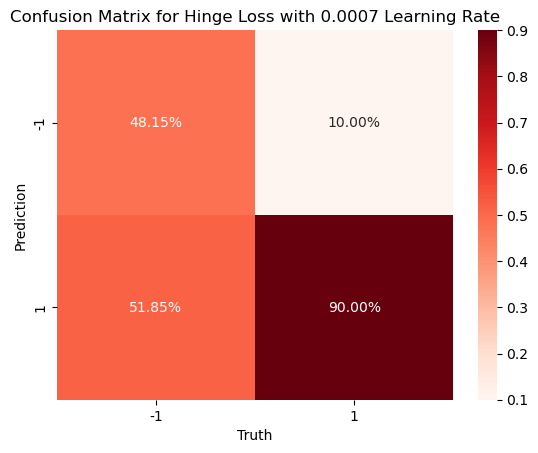

In [35]:
# hinge loss test
model = Perceptron()
model.fit(X, y, model.hinge_loss, lr = 0.0007, bias=True, epochs = 50)
model.get_cm("Confusion Matrix for Hinge Loss with 0.0007 Learning Rate")

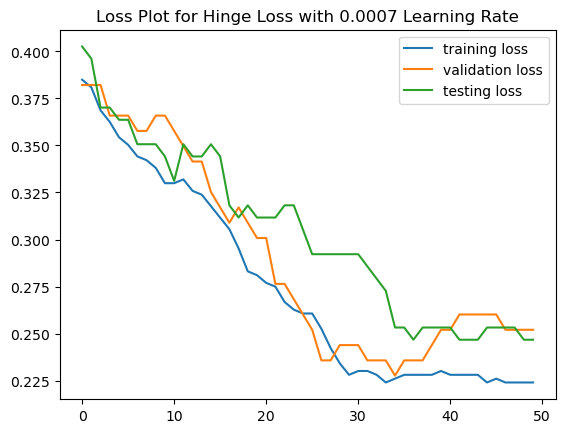

In [36]:
model.plot_loss("Loss Plot for Hinge Loss with 0.0007 Learning Rate")

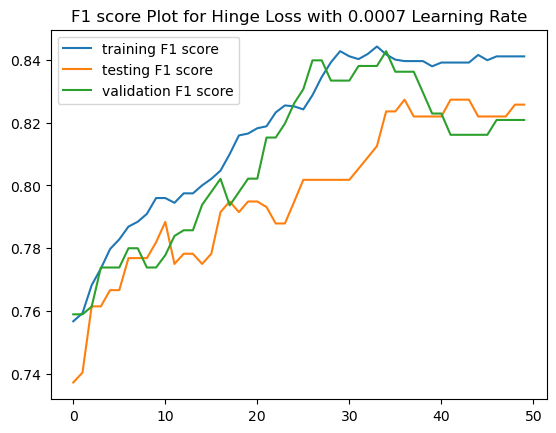

In [37]:
model.plot_acc("F1 score Plot for Hinge Loss with 0.0007 Learning Rate")

In [38]:
max(model.acc["test"])

0.8272727272727273

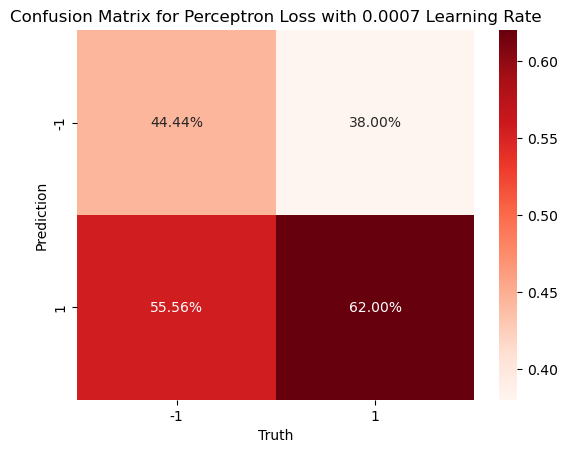

In [39]:
# perceptron loss test
model = Perceptron()
model.fit(X, y, model.perceptron_loss, lr = 0.0007, bias=True, epochs = 50)
model.get_cm("Confusion Matrix for Perceptron Loss with 0.0007 Learning Rate")

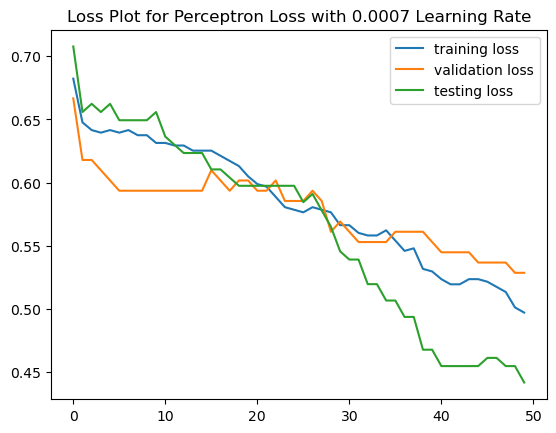

In [40]:
model.plot_loss("Loss Plot for Perceptron Loss with 0.0007 Learning Rate")

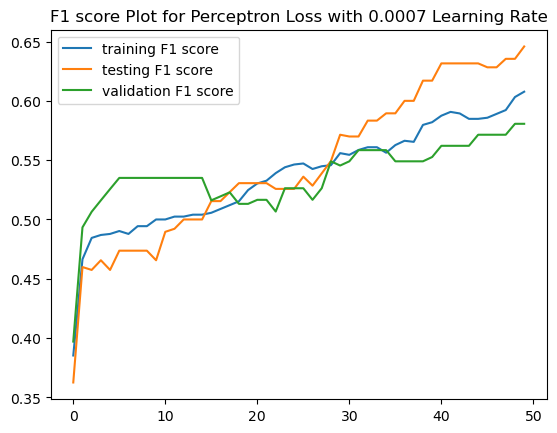

In [41]:
model.plot_acc("F1 score Plot for Perceptron Loss with 0.0007 Learning Rate")

In [42]:
max(model.acc["test"])

0.6458333333333334

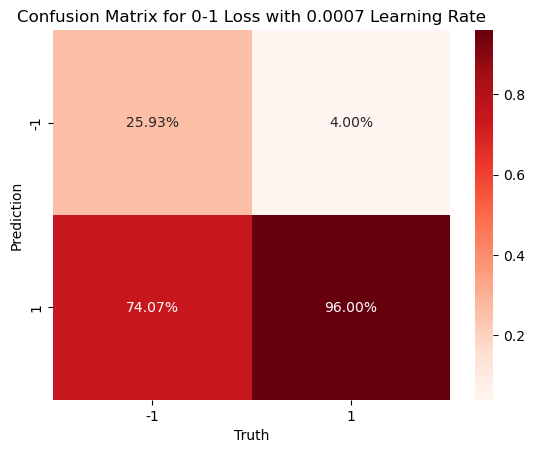

In [43]:
# 0-1 loss test
model = Perceptron()
model.fit(X, y, model.loss_01, lr = 0.0007, bias=True, epochs = 50)
model.get_cm("Confusion Matrix for 0-1 Loss with 0.0007 Learning Rate")

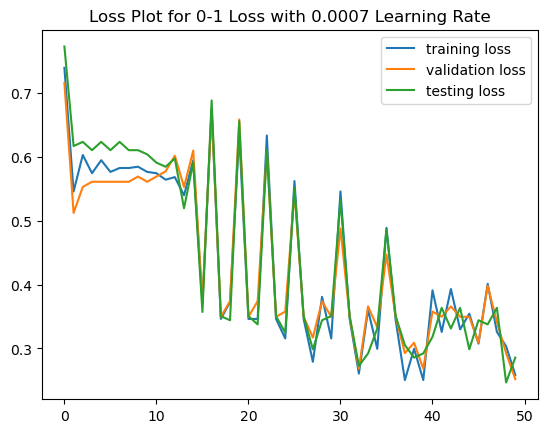

In [44]:
model.plot_loss("Loss Plot for 0-1 Loss with 0.0007 Learning Rate")

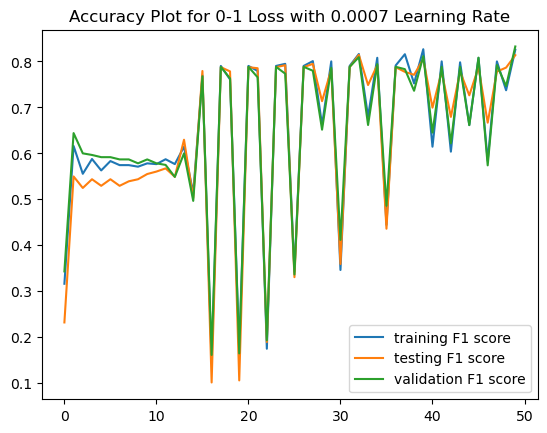

In [45]:
model.plot_acc("Accuracy Plot for 0-1 Loss with 0.0007 Learning Rate")

In [46]:
max(model.acc["test"])

0.8141592920353983

## 4.2 Learning Rate Test

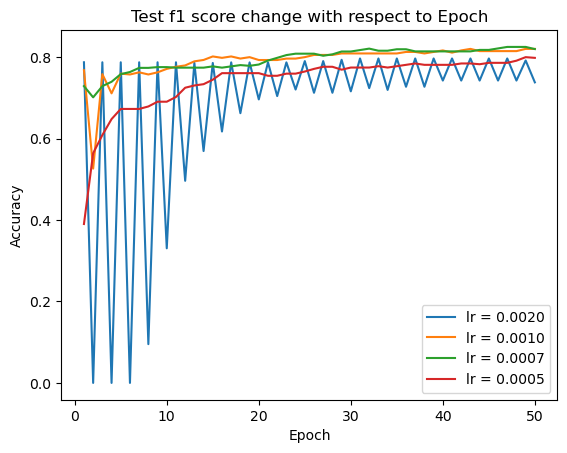

In [54]:
for lr in [0.002, 0.001, 0.0007, 0.0005]:
    model = Perceptron()
    model.fit(X, y, model.hinge_loss, lr = lr, bias=True, epochs = 50)
    plt.plot(range(1, 51), model.acc["test"], label = "lr = %.4f"%(lr))

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Test f1 score change with respect to Epoch")
plt.legend()
plt.show()

## 4.3 Test for the effect of bais

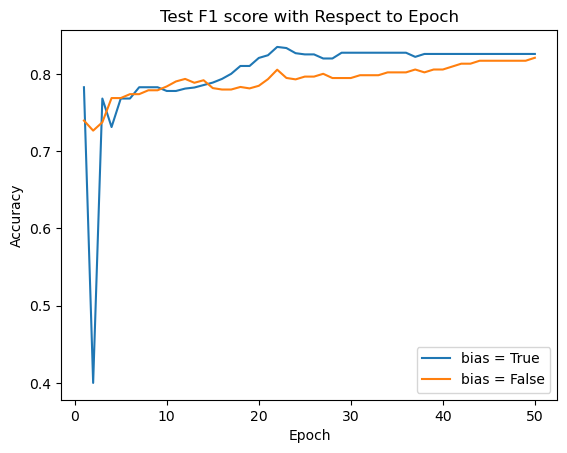

In [52]:
for bis in [True, False]:
    model = Perceptron()
    model.fit(X, y, model.hinge_loss, lr = 0.001, bias=bis, epochs = 50)
    plt.plot(range(1, 51), model.acc["test"], label = "bias = %s"%(bis))

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Test F1 score with Respect to Epoch")
plt.legend()
plt.show()